In [1]:
import torch

inputs = torch.tensor(
    [
        [0.43, 0.15, 0.89],  # Your (x^1)
        [0.55, 0.87, 0.66],  # journey (x^2)
        [0.57, 0.85, 0.64],  # starts (x^3)
        [0.22, 0.58, 0.33],  # with (x^4)
        [0.77, 0.25, 0.10],  # one (x^5)
        [0.05, 0.80, 0.55],  # step (x^6)
    ]
)

In [15]:
query = inputs[1]
atten_scores_2 = torch.empty(inputs.shape[0])

for i, x_i in enumerate(inputs):
    atten_scores_2[i] = torch.dot(x_i, query)

print(atten_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [3]:
# Understanding dot products
# A dot product is essentially a concise way of multiplying two vectors element-wise and
# then summing the products, which can be demonstrated as follows:
res = 0.
for idx, element in enumerate(inputs[0]):
 res += inputs[0][idx] * query[idx]
print(res)
print(torch.dot(inputs[0], query))

tensor(0.9544)
tensor(0.9544)


In [4]:
attn_weights_2_tmp = atten_scores_2 / atten_scores_2.sum()
print(atten_scores_2.sum())
print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

tensor(6.5617)
Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


In [ ]:
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)


attn_weights_naive = softmax_naive(atten_scores_2)
print("Attentions weights:", attn_weights_naive)
print("Sum", attn_weights_naive.sum())

Attentions weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum tensor(1.)


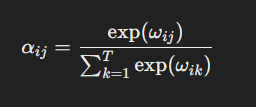
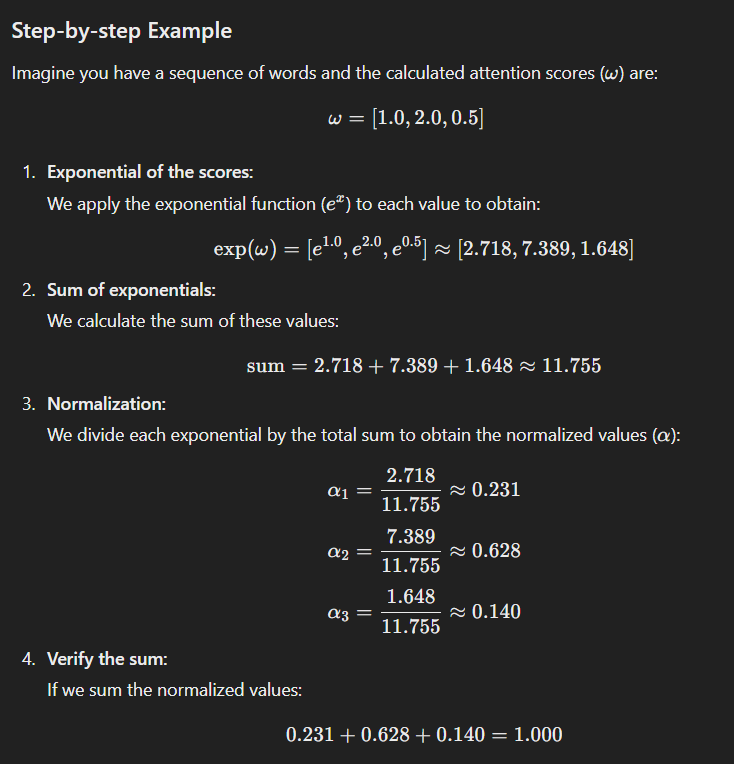

In [10]:
attn_weights_2 = torch.softmax(atten_scores_2, dim=0)
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [20]:
# Calculating the context vector
# multiplying the embedded input tokens,
# with the corresponding attention weights and then summing the resulting vectors.

query = inputs[1]
context_vec_2 = torch.zeros(query.shape)
print(context_vec_2)
# print(attn_weights_2[4] * inputs[4] + attn_weights_2[3] * inputs[3])
for i, x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i] * x_i

print(context_vec_2)

tensor([0., 0., 0.])
tensor([0.4419, 0.6515, 0.5683])


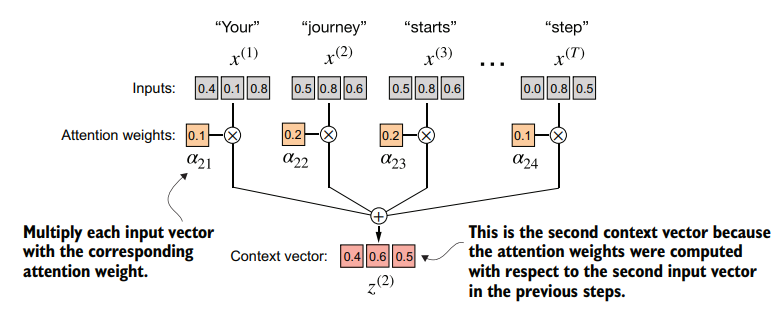

In [ ]:
# Computing attention weights for all input tokens
attn_scores = torch.empty(6, 6)

# Compute attention scores
for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [24]:
# matrix multiplication
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


### Rules for multiplying matrices
To multiply two matrices, say 𝐴 and 𝐵, they must meet the following condition:

The number of columns of A must be equal to the number of rows of B.

If 𝐴 has the shape (𝑚×𝑛) y 𝐵 has the shape (𝑛×𝑝), then the product 𝐶=𝐴⋅𝐵 will have the shape (𝑚×𝑝).


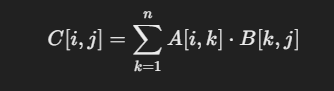
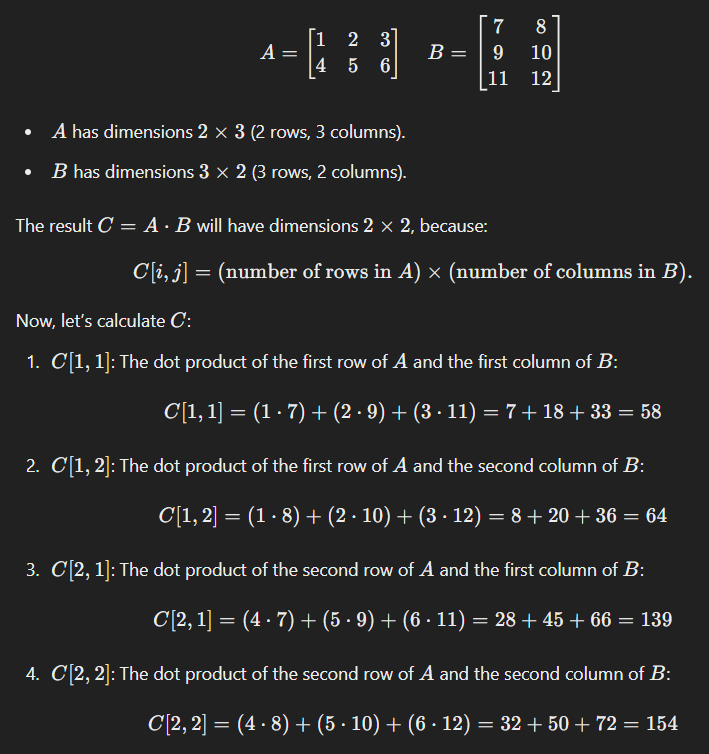
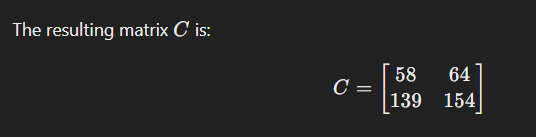
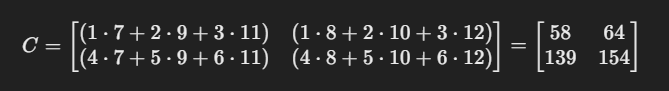

In [ ]:
# Compute attention weights
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [26]:
row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print("Row 2 sum:", row_2_sum)
print("All row sums:", attn_weights.sum(dim=-1))

Row 2 sum: 1.0
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [30]:
# Compute context vectors

all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [31]:
print("Previous 2nd context vector:", context_vec_2)

Previous 2nd context vector: tensor([0.4419, 0.6515, 0.5683])


In [ ]:
# Implementing self-attention with trainable weights
